In [50]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [51]:
weather = pd.read_csv('./r1_weather_pointMapCluster/part-00000-e50c8ded-62bd-4273-95c0-bb24589b34f6-c000.csv')
weather

,cluster_index,air_pressure,air_temp,relative_humidity
0,0,912.3,64.76,60.5
1,0,912.3,63.86,39.9
2,0,912.3,64.22,43.0
3,0,912.3,64.40,49.5
4,0,912.3,64.40,58.8
...,...,...,...,...
1587252,0,915.9,74.66,46.3
1587253,0,915.9,74.66,46.2
1587254,0,915.9,74.66,46.3
1587255,0,915.9,74.66,46.2


In [52]:
# weather = weather.sample(frac=0.5)
pca_weather = PCA(n_components=2)
pcaComponent_weather = pca_weather.fit_transform(weather.iloc[:, 1:].values)
labels = weather.iloc[:, 0]

pcaComponent_weather_DF = pd.DataFrame(data = pcaComponent_weather, columns = ['pc1', 'pc2'])

In [53]:
labels

0          0
1          0
2          0
3          0
4          0
          ..
1587252    0
1587253    0
1587254    0
1587255    0
1587256    0
Name: cluster_index, Length: 1587257, dtype: int64

In [54]:
pcaComponent_weather_DF.tail()

,pc1,pc2
1587252,-5.065776,-11.872857
1587253,-5.161056,-11.843279
1587254,-5.065776,-11.872857
1587255,-5.161056,-11.843279
1587256,-5.065776,-11.872857


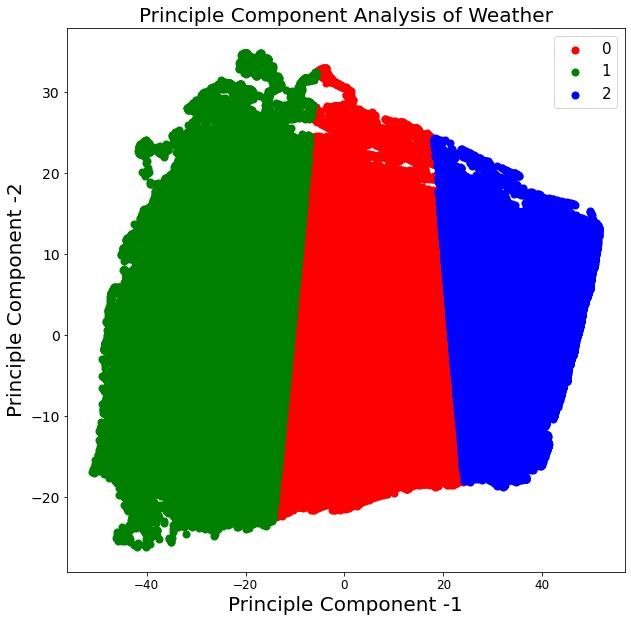

In [55]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principle Component -1', fontsize=20)
plt.ylabel('Principle Component -2', fontsize=20)
plt.title("Principle Component Analysis of Weather", fontsize=20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = weather['cluster_index'] == target
    plt.scatter(pcaComponent_weather_DF.loc[indicesToKeep, 'pc1'],
               pcaComponent_weather_DF.loc[indicesToKeep, 'pc2'],
               c= color,
               s = 50)
plt.legend(targets, prop={'size':15})